In [14]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [15]:
dataset_path = "D:\Sub PPT's\Projects\Soil Moisture Detection\Soil types dataset\Dataset"

In [16]:
# List files in the dataset directory
files = os.listdir(dataset_path)
print(files)

['Alluvial soil', 'Black Soil', 'Clay soil', 'Red soil']


In [17]:
# Define image dimensions
img_width, img_height = 224, 224

In [18]:
# List all subdirectories in the dataset directory
subdirectories = [name for name in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, name))]

# Print the number of classes
num_classes = len(subdirectories)
print(f"Number of classes in the dataset: {num_classes}")

Number of classes in the dataset: 4


In [19]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [34]:
import splitfolders

# Path to your dataset directory
dataset_path = "D:\Sub PPT's\Projects\Soil Moisture Detection\Soil types dataset\Dataset"

# Perform the split
splitfolders.ratio(dataset_path, output="output_soil", seed=1337, ratio=(.8, 0.1, 0.1))

Copying files: 1219 files [00:04, 252.20 files/s]


In [35]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Rescale pixel values to [0, 1]
    shear_range=0.2,     # Shear angle in counter-clockwise direction
    zoom_range=0.2,      # Range for random zoom
    horizontal_flip=True)  # Randomly flip inputs horizontally

# Validation and Test data should not be augmented
valid_test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [36]:
train_generator = train_datagen.flow_from_directory("output_soil/train",
                                                    batch_size=32,
                                                    color_mode="rgb",
                                                    target_size=(224, 224),
                                                    class_mode='categorical')

test_generator = train_datagen.flow_from_directory("output_soil/test",
                                                   batch_size=32,
                                                   color_mode="rgb",
                                                   target_size=(224, 224),
                                                   class_mode='categorical')

validation_generator = valid_test_datagen.flow_from_directory("output_soil/val",
                                                              batch_size=32,
                                                              color_mode="rgb",
                                                              target_size=(224, 224),
                                                              class_mode='categorical')

Found 974 images belonging to 4 classes.
Found 125 images belonging to 4 classes.
Found 120 images belonging to 4 classes.


In [37]:
print("Train classes:", train_generator.class_indices)
print("Test classes:", test_generator.class_indices)
print("Validation classes:", validation_generator.class_indices)


Train classes: {'Alluvial soil': 0, 'Black Soil': 1, 'Clay soil': 2, 'Red soil': 3}
Test classes: {'Alluvial soil': 0, 'Black Soil': 1, 'Clay soil': 2, 'Red soil': 3}
Validation classes: {'Alluvial soil': 0, 'Black Soil': 1, 'Clay soil': 2, 'Red soil': 3}


VGG-16

Training Accuracy: 0.9055441617965698     
Test Accuracy: 0.9440000057220459

In [38]:
# Load the pre-trained VGG-16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [39]:
# Freeze the weights of the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

In [40]:
# Create a new model on top of the pre-trained VGG-16 base
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

In [41]:
# Compile the model with the updated learning rate argument
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [43]:
# Get a sample from the generator
sample_batch, _ = train_generator.next()

# Display the shape
print("Sample batch shape:", sample_batch.shape)

Sample batch shape: (32, 224, 224, 3)


In [46]:
# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

Epoch 1/20
31/31 [==============================] - 146s 5s/step - loss: 0.5495 - accuracy: 0.7895 - val_loss: 0.4493 - val_accuracy: 0.8250
Epoch 2/20
31/31 [==============================] - 167s 5s/step - loss: 0.5153 - accuracy: 0.8039 - val_loss: 0.4216 - val_accuracy: 0.8250
Epoch 3/20
31/31 [==============================] - 160s 5s/step - loss: 0.4792 - accuracy: 0.8193 - val_loss: 0.4008 - val_accuracy: 0.8583
Epoch 4/20
31/31 [==============================] - 165s 5s/step - loss: 0.4426 - accuracy: 0.8224 - val_loss: 0.3789 - val_accuracy: 0.8417
Epoch 5/20
31/31 [==============================] - 148s 5s/step - loss: 0.3911 - accuracy: 0.8573 - val_loss: 0.3474 - val_accuracy: 0.8500
Epoch 6/20
31/31 [==============================] - 150s 5s/step - loss: 0.3511 - accuracy: 0.8624 - val_loss: 0.3456 - val_accuracy: 0.8583
Epoch 7/20
31/31 [==============================] - 154s 5s/step - loss: 0.3407 - accuracy: 0.8809 - val_loss: 0.3240 - val_accuracy: 0.8750
Epoch 8/20
31

In [47]:
# Evaluate Model Performance
test_loss, test_accuracy = model.evaluate(test_generator)

4/4 [==============================] - 14s 3s/step - loss: 0.1886 - accuracy: 0.9440


In [48]:
# Get the training accuracy from the history object
training_accuracy = history.history['accuracy'][-1]

In [49]:
# Print the training accuracy
print("Training Accuracy:", training_accuracy)

Training Accuracy: 0.9055441617965698


In [50]:
# Print the test accuracy
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9440000057220459


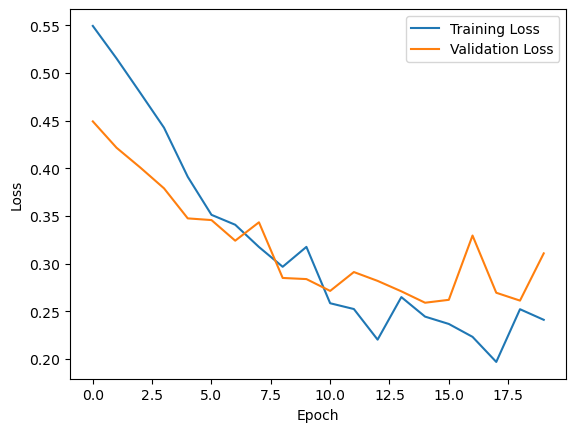

In [51]:
# Visualize Training History
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

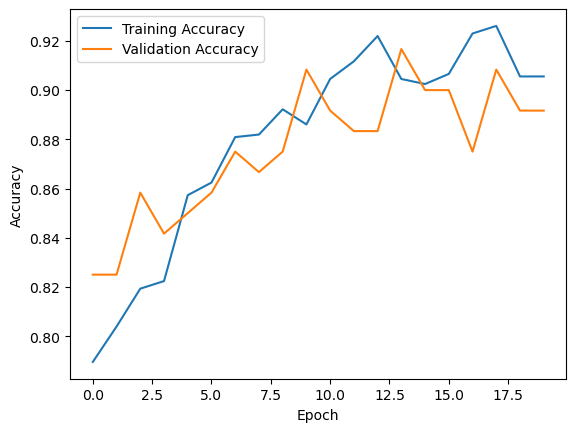

In [52]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [53]:
# Save the Trained Model
model.save('soil_model.h5')

In [54]:
# Load the saved model
from keras.models import load_model
model = load_model('soil_model.h5')

In [55]:
import numpy as np
from PIL import Image
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [60]:
#Define the class names corresponding to the model's output indices
class_names = ["Alluvial soil", "Black Soil", "Clay soil", "Red soil"]

In [61]:
# Function to preprocess the input image
def preprocess_image(img_path):
    img = Image.open(img_path)
    img = img.resize((224, 224))  # Resize the image to match VGG-16 input size
    img_array = np.array(img)
    img_array = img_array / 255.0  # Normalize the image data
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img, img_array

In [62]:
# Function to make predictions and return the predicted class name
def predict_class(img_path):
    img, img_array = preprocess_image(img_path)
    prediction = model.predict(img_array)  # Get the prediction probabilities
    predicted_class_index = np.argmax(prediction)  # Get the index of the highest probability
    predicted_class_name = class_names[predicted_class_index]  # Get the class name
    return img, predicted_class_name

In [63]:
# Example usage: predicting the class of a given image
image_path = "D:\Sub PPT's\Projects\Soil Moisture Detection\Soil types dataset\Dataset\Alluvial soil\Alluvial_35.jpg"  
img, predicted_class = predict_class(image_path)

1/1 [==============================] - 1s 899ms/step


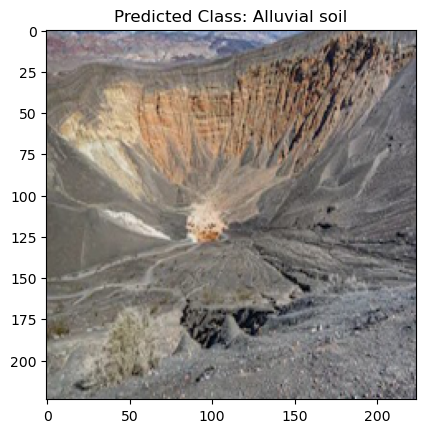

In [64]:
# Display the original image and the predicted class
plt.imshow(img)
plt.title(f"Predicted Class: {predicted_class}")
plt.show()

InceptionV3

Training Accuracy: 0.9609856009483337         
Test Accuracy: 0.9440000057220459

In [15]:
from keras.applications import InceptionV3
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [16]:
# Load the pre-trained InceptionV3 model without the top (fully connected) layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [17]:
# Freeze the weights of the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

In [18]:
num_classes = 4;

In [19]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Rescale pixel values to [0, 1]
    shear_range=0.2,     # Shear angle in counter-clockwise direction
    zoom_range=0.2,      # Range for random zoom
    horizontal_flip=True)  # Randomly flip inputs horizontally

# Validation and Test data should not be augmented
valid_test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [20]:
train_generator = train_datagen.flow_from_directory("output_soil/train",
                                                    batch_size=32,
                                                    color_mode="rgb",
                                                    target_size=(224, 224),
                                                    class_mode='categorical')

test_generator = train_datagen.flow_from_directory("output_soil/test",
                                                   batch_size=32,
                                                   color_mode="rgb",
                                                   target_size=(224, 224),
                                                   class_mode='categorical')

validation_generator = valid_test_datagen.flow_from_directory("output_soil/val",
                                                              batch_size=32,
                                                              color_mode="rgb",
                                                              target_size=(224, 224),
                                                              class_mode='categorical')


Found 974 images belonging to 4 classes.
Found 125 images belonging to 4 classes.
Found 120 images belonging to 4 classes.


In [21]:
print("Train classes:", train_generator.class_indices)
print("Test classes:", test_generator.class_indices)
print("Validation classes:", validation_generator.class_indices)

Train classes: {'Alluvial soil': 0, 'Black Soil': 1, 'Clay soil': 2, 'Red soil': 3}
Test classes: {'Alluvial soil': 0, 'Black Soil': 1, 'Clay soil': 2, 'Red soil': 3}
Validation classes: {'Alluvial soil': 0, 'Black Soil': 1, 'Clay soil': 2, 'Red soil': 3}


In [22]:
# Add custom classification layers on top
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=x)

In [23]:
# Compile the model with the updated learning rate argument
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                           

In [25]:
# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

Epoch 1/20
31/31 [==============================] - 43s 1s/step - loss: 1.0799 - accuracy: 0.6109 - val_loss: 0.6724 - val_accuracy: 0.7083
Epoch 2/20
31/31 [==============================] - 36s 1s/step - loss: 0.4462 - accuracy: 0.8398 - val_loss: 0.4716 - val_accuracy: 0.8000
Epoch 3/20
31/31 [==============================] - 36s 1s/step - loss: 0.3314 - accuracy: 0.8891 - val_loss: 0.3548 - val_accuracy: 0.8500
Epoch 4/20
31/31 [==============================] - 63s 2s/step - loss: 0.2935 - accuracy: 0.8953 - val_loss: 0.3011 - val_accuracy: 0.9167
Epoch 5/20
31/31 [==============================] - 37s 1s/step - loss: 0.2490 - accuracy: 0.9117 - val_loss: 0.3070 - val_accuracy: 0.8917
Epoch 6/20
31/31 [==============================] - 37s 1s/step - loss: 0.2146 - accuracy: 0.9292 - val_loss: 0.3065 - val_accuracy: 0.8917
Epoch 7/20
31/31 [==============================] - 37s 1s/step - loss: 0.1848 - accuracy: 0.9363 - val_loss: 0.3271 - val_accuracy: 0.8917
Epoch 8/20
31/31 [==

In [26]:
# Evaluate Model Performance
test_loss, test_accuracy = model.evaluate(test_generator)

4/4 [==============================] - 5s 1s/step - loss: 0.2117 - accuracy: 0.9440


In [27]:
# Get the training accuracy from the history object
training_accuracy = history.history['accuracy'][-1]

In [28]:
# Print the training accuracy
print("Training Accuracy:", training_accuracy)

Training Accuracy: 0.9609856009483337


In [29]:
# Print the test accuracy
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9440000057220459


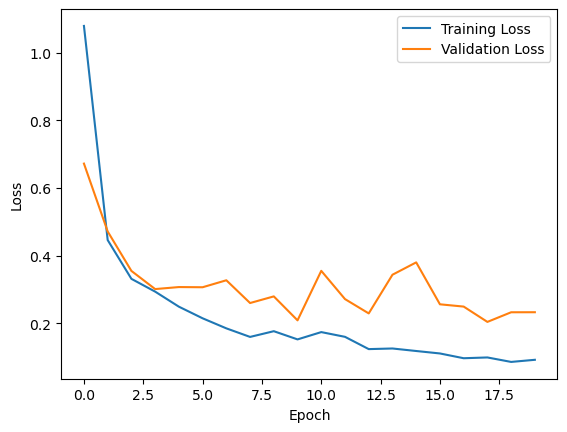

In [31]:
# Visualize Training History
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

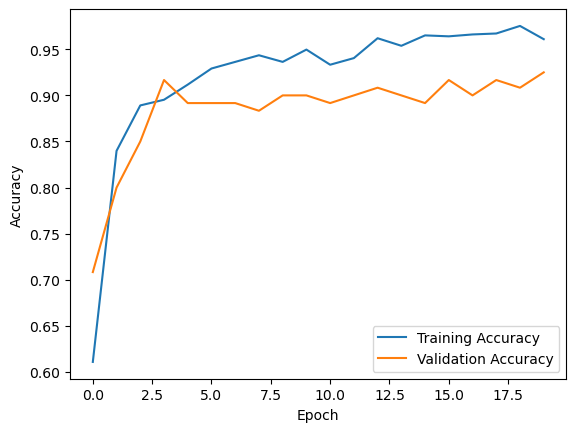

In [32]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [33]:
# Save the Trained Model
model.save('inceptionsoil_model.h5')

In [34]:
# Load the saved model
from keras.models import load_model
model = load_model('inceptionsoil_model.h5')

In [35]:
import numpy as np
from PIL import Image
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [36]:
#Define the class names corresponding to the model's output indices
class_names = ["Alluvial soil", "Black Soil", "Clay soil", "Red soil"]

In [37]:
# Function to preprocess the input image
def preprocess_image(img_path):
    img = Image.open(img_path)
    img = img.resize((224, 224))  # Resize the image to match VGG-16 input size
    img_array = np.array(img)
    img_array = img_array / 255.0  # Normalize the image data
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img, img_array

In [38]:
# Function to make predictions and return the predicted class name
def predict_class(img_path):
    img, img_array = preprocess_image(img_path)
    prediction = model.predict(img_array)  # Get the prediction probabilities
    predicted_class_index = np.argmax(prediction)  # Get the index of the highest probability
    predicted_class_name = class_names[predicted_class_index]  # Get the class name
    return img, predicted_class_name

In [39]:
# Example usage: predicting the class of a given image
image_path = "D:\Sub PPT's\Projects\Soil Moisture Detection\Soil types dataset\Dataset\Red soil\Copy of images113.jpg"  
img, predicted_class = predict_class(image_path)

1/1 [==============================] - 1s 1s/step


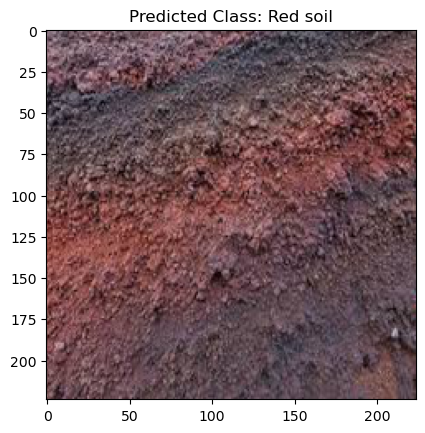

In [40]:
# Display the original image and the predicted class
plt.imshow(img)
plt.title(f"Predicted Class: {predicted_class}")
plt.show()

ResNet50 with TensorFlow/Keras

In [42]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [43]:
# Data paths and preprocessing
train_dir = "output_soil/train"  # Change to your training dataset path
validation_dir = "output_soil/val"  # Change to your validation dataset path

In [44]:
# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=preprocess_input,
)

# No augmentation for validation
validation_datagen = ImageDataGenerator(
    rescale=1.0/255,
    preprocessing_function=preprocess_input,
)

In [45]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
)

Found 974 images belonging to 4 classes.
Found 120 images belonging to 4 classes.


In [46]:
# Create the ResNet50 model with transfer learning
base_model = ResNet50(
    weights="imagenet",  # Pre-trained weights
    include_top=False,  # Exclude the fully connected top layer
    input_shape=(224, 224, 3),
)

94765736/94765736 [==============================] - 51s 1us/step


In [47]:
# Adding custom top layers for your classification task
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation="softmax"),  # Adjust to your number of classes
])

In [48]:
# Compile the model
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

In [49]:
# Train the model
model.fit(
    train_generator,
    epochs=20,  # Change as needed
    validation_data=validation_generator,
)

Epoch 1/20
31/31 [==============================] - 249s 8s/step - loss: 0.7047 - accuracy: 0.7669 - val_loss: 1905.1661 - val_accuracy: 0.4333
Epoch 2/20
31/31 [==============================] - 247s 8s/step - loss: 0.7710 - accuracy: 0.8203 - val_loss: 1117.2048 - val_accuracy: 0.1833
Epoch 3/20
31/31 [==============================] - 234s 8s/step - loss: 0.4975 - accuracy: 0.8388 - val_loss: 62.4832 - val_accuracy: 0.4333
Epoch 4/20
31/31 [==============================] - 250s 8s/step - loss: 0.3767 - accuracy: 0.8871 - val_loss: 1.5543 - val_accuracy: 0.4333
Epoch 5/20
31/31 [==============================] - 249s 8s/step - loss: 0.4083 - accuracy: 0.8778 - val_loss: 3.8896 - val_accuracy: 0.2250
Epoch 6/20
31/31 [==============================] - 240s 8s/step - loss: 0.3245 - accuracy: 0.8973 - val_loss: 5.5791 - val_accuracy: 0.2250
Epoch 7/20
31/31 [==============================] - 236s 8s/step - loss: 0.3002 - accuracy: 0.8994 - val_loss: 1.3487 - val_accuracy: 0.2250
Epoch 

In [9]:
# First, ensure you've installed the required libraries
!pip install Pillow rasterio

In [10]:
import numpy as np
import rasterio  # For handling geospatial raster data
import matplotlib.pyplot as plt
from PIL import Image  # Pillow library for image manipulation

In [20]:
# Load a TIFF image
image_path = "D:\Sub PPT's\Projects\Soil Moisture Detection\Sentinel data\Sentinel2_Allahabad_2017_AllBands-0000000000-0000000000.tif"
with rasterio.open(image_path) as src:
    # Read the first band (assuming grayscale or single-band image)
    image_data = src.read(1)

In [21]:
# Calculate the average pixel intensity
average_intensity = np.mean(image_data)

In [22]:
# Define moisture thresholds (adjust these based on your dataset)
# Higher values generally indicate less moisture (lighter soil)
if average_intensity < 100:
    moisture_level = "High Moisture"
elif 100 <= average_intensity <= 150:
    moisture_level = "Moderate Moisture"
else:
    moisture_level = "Low Moisture"

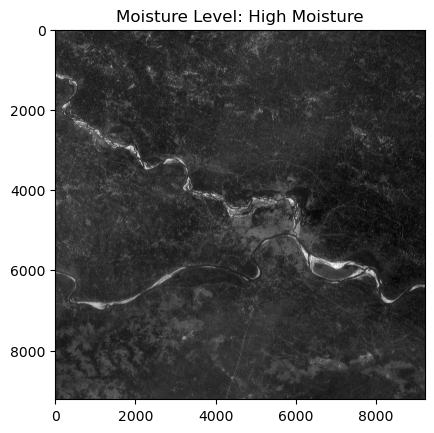

In [23]:
# Display the image with moisture level information
plt.imshow(image_data, cmap='gray')  # Display in grayscale
plt.title(f"Moisture Level: {moisture_level}")
plt.show()

Soil Health Indicators

In [5]:
import rasterio  # For reading .tif files
import cv2  # For image processing
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters, feature
from PIL import Image

In [6]:
# Load a TIFF image using rasterio
image_path = "D:\Sub PPT's\Projects\Soil Moisture Detection\Sentinel data\Sentinel2_Allahabad_2017_AllBands-0000000000-0000000000.tif"

In [7]:
with rasterio.open(image_path) as src:
    # Read the first band (assuming it's grayscale)
    image_data = src.read(1)

In [8]:
# Convert to a format suitable for OpenCV
image = (image_data / image_data.max() * 255).astype(np.uint8)  # Normalize to 0-255
gray_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # Convert to grayscale

# Calculate edge-based texture using Canny edge detection
edges = cv2.Canny(gray_image, 100, 200)

# Calculate the mean number of edges as a proxy for texture
texture_intensity = np.mean(edges)

In [9]:
if texture_intensity > 50:
    soil_health = "High Texture (Possibly Unhealthy)"
else:
    soil_health = "Low Texture (Possibly Healthy)"

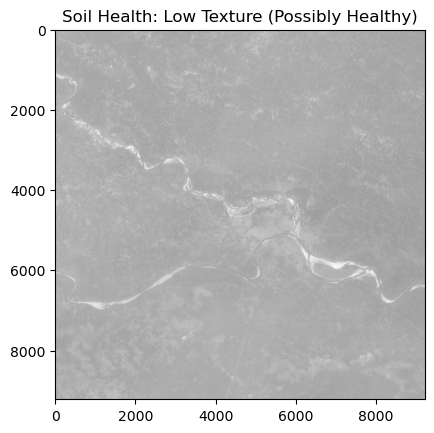

In [10]:
# Display the image with soil health information
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title(f"Soil Health: {soil_health}")
plt.show()